In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import seaborn
%matplotlib inline

# Tutorial

In [2]:
r1 = requests.get('https://httpbin.org/ip')

print('Response status code: {}\n'.format(r1.status_code)) # 200 = successful HTTP request
print('Response headers: {}\n'.format(r1.headers))
print('Response body: {}\n'.format(r1.text))

Response status code: 200

Response headers: {'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Date': 'Tue, 12 Feb 2019 12:21:26 GMT', 'Content-Type': 'application/json', 'Content-Length': '33', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Via': '1.1 vegur'}

Response body: {
  "origin": "193.72.144.227"
}




In [3]:
# Do the request
r2 = requests.get('https://httpbin.org/html')
r2.text[:300]

'<!DOCTYPE html>\n<html>\n  <head>\n  </head>\n  <body>\n      <h1>Herman Melville - Moby-Dick</h1>\n\n      <div>\n        <p>\n          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Per'

In [4]:
# Extract the header
soup = BeautifulSoup(r2.text, 'html.parser')
soup.h1

<h1>Herman Melville - Moby-Dick</h1>

********************************************************************

In [5]:
r3 = requests.get('http://dblp.uni-trier.de/pers/hd/v/Vetterli:Martin')
r3.text[:300]

'<!DOCTYPE html>\n<html lang="en">\n<head data-urlpt="v/Vetterli:Martin"><meta charset="UTF-8" /><title>dblp: Martin Vetterli</title><link href="https://dblp.org" rel="home" /><link rel="apple-touch-icon" type="image/png" sizes="192x192" href="https://dblp.uni-trier.de/img/dblp.icon.192x192.png"><link '

In [6]:
soup3 = BeautifulSoup(r3.text, 'html.parser')

In [7]:
soup3.title.string

'dblp: Martin Vetterli'

In [8]:
all_links = soup3.find_all('a')
print('The webpage cointains {0} links.'.format(len(all_links)))

The webpage cointains 11917 links.


In [9]:
external_links = 0
for link in all_links:
    if(not link.get('href').startswith('http://dblp.uni-trier.de/')
       and link.get('href').startswith('http')):  # just an example, you need more checks
        external_links += 1

print('{0} of these links point to external websites.'.format(external_links))

11097 of these links point to external websites.


In [10]:
soup3.find_all('li', class_='entry')[0].find('span', class_='title')

<span class="title" itemprop="name">Learning neural connectivity from firing activity: efficient algorithms with provable guarantees on topology.</span>

In [11]:
for p in soup3.find_all('li', class_='entry')[:6]:
    print(p.find('span', class_='title').text)

Learning neural connectivity from firing activity: efficient algorithms with provable guarantees on topology.
Unlabeled Sensing With Random Linear Measurements.
Sampling Continuous-Time Sparse Signals: A Frequency-Domain Perspective.
Efficient Multidimensional Diracs Estimation With Linear Sample Complexity.
Sampling at Unknown Locations: Uniqueness and Reconstruction Under Constraints.
Combining Range and Direction for Improved Localization.


In [14]:
publications_list = []
for p in soup3.find_all('li', class_='entry'):
    title = p.find('span', class_='title').text  # get the title
    authos_list = p.find_all('span', {'itemprop': 'author'})  # get the authors list
    authors = [author.text for author in authos_list]  
    year = p.find('span', {'itemprop': 'datePublished'}).text
    publications_list.append({'title': title, 
                         'authors': authors, 
                         'year': int(year)})  # here you should validate the data

publications = pd.DataFrame.from_dict(publications_list)
publications.head(10)

,authors,title,year
0,"[Amin Karbasi, Amir Hesam Salavati, Martin Vet...",Learning neural connectivity from firing activ...,2018
1,"[Jayakrishnan Unnikrishnan, Saeid Haghighatsho...",Unlabeled Sensing With Random Linear Measureme...,2018
2,"[Benjamín Béjar Haro, Martin Vetterli]",Sampling Continuous-Time Sparse Signals: A Fre...,2018
3,"[Hanjie Pan, Thierry Blu, Martin Vetterli]",Efficient Multidimensional Diracs Estimation W...,2018
4,"[Golnoosh Elhami, Michalina Pacholska, Benjamí...",Sampling at Unknown Locations: Uniqueness and ...,2018
5,"[Gilles Baechler, Frederike Diimbgen, Golnoosh...",Combining Range and Direction for Improved Loc...,2018
6,"[Miranda Krekovic, Gilles Baechler, Ivan Dokma...",Structure from Sound with Incomplete Data.,2018
7,"[Adam Scholefield, Alireza Ghasemi, Martin Vet...",Bound and Conquer: Improving Triangulation by ...,2018
8,"[Gilles Baechler, Miranda Krekovic, Juri Ranie...",Super Resolution Phase Retrieval for Sparse Si...,2018
9,"[Niranjan Thanikachalam, Loïc Baboulaz, Damien...",Handheld Reflectance Acquisition of Paintings.,2017


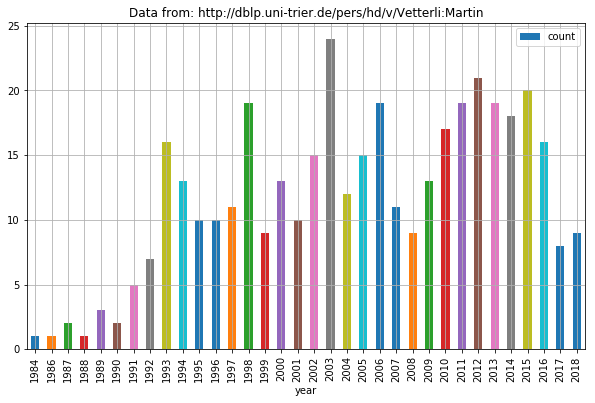

In [20]:
publications.groupby('year').count().rename(columns = {'title':'count'})\
    .plot(y='count', kind='bar', grid=True, figsize=(10, 6), title='Data from: ' + 'http://dblp.uni-trier.de/pers/hd/v/Vetterli:Martin')